## **Presentación del Proyecto: "Identificación de Factores de Riesgo Predictivos para la Diabetes"**

**1.- Hipótesis**
Los factores como la edad, el índice de masa corporal (IMC), la presión arterial y los niveles de actividad física son altamente predictivos del riesgo de diabetes. Se espera que los pacientes de mayor edad, IMC y presión arterial, sumado a niveles menores de actividad física tienen una mayor probabilidad de padecer diabetes.

**2.- Objetivo y alcance**
El objetivo es desarrollar un modelo de clasificación donde se pueda predecir el desarrollo de diabetes basado en información disponible en encuestas sobre variables relacionadas a la salud, hábitos, parámetros socioeconómicos y demográficos. Identificar los factores de riesgo más significativos que predicen el riesgo de diabetes en los individuos puede ser útil para profesionales de salud, estudiantes e investigadores de áreas relacionadas, ya que permitirá identificar patrones en los datos que puedan influir en el desarrollo de diabetes, ayudando en la toma de decisiones de prevención y tratamientos.

# Data Acquisition

# **Metadata**

**1.- Descripción de los datos**

Respuestas sobre comportamientos de riesgo para la salud, condiciones de salud crónicas y el uso de servicios preventivos. Son encuestas telefónicas realizadas por el Sistema de Vigilancia de Factores de riesgo del comportamiento (Behavioral Risk Factor Surveillance System, BRFSS) recopilada anualmente por los CDC en Estados Unidos.

Volumen estimado: 250000 registros en el año 2015

Fuente: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


**2.- Glosario de datos**

Variable objetivo (Traducción): descripción

*   **Diabetes_012**: 0 = no diabetes, 1 = prediabetes, 2 = diabetes

Característica (Traducción): descripción

*   **HighBP** (High Blood Pressure o Presión arterial alta): 0 = no High BP, 1 = yes High BP
*   **HighChol** (High cholesterol o Colesterol alto): 0 = no High Chol, 1 = yes High Chol
*   **CholCheck** (Cholesterol check in the last 5 years o Chequeo de colesterol en los últimos 5 años): 0 = no high Chol check in 5 years, 1 = yes Chol check in 5 years
*   **BMI** (Body Mass Index o Índice de Masa Corporal): es una medida que se calcula dividiendo el peso de una persona (en kilogramos) por el cuadrado de su altura (en metros).
*   **Smoker** (Fumador): Have you smoked at least 100 cigarettes in your entire life? (Note: 5 packs = 100 cigarettes) 0 = no, 1 = yes
*   **Stroke** (Derrame cerebral): Have you ever had a stroke? 0 = no, 1 = yes
*   **HeartDiseaserorAttack** (Enfermedad o Infarto cardíaco): Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes
*   **PhysActivity** (Actividad física): Physical activity in past 30 days – not including job. 0 = no, 1 = yes
*   **Fruits** (Frutas): Consume fruits 1 or more times per day. 0 = no, 1 = yes
*   **Veggies** (Vegetales): Consume vegetables 1 or more times per day. 0 = no, 1 = yes
*   **HyvAlcoholC** (Heavy Alcohol Conssumption o Consumo de alcohol alto): Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes
*   **AnyHealthcare** (Any Health Care o Alguna Asistencia Médica): Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes.
*   **NoDocbcCost** (No Doctor because cost o No Doctor por el costo): Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes.
*   **GenHlth** (Genetic Health o Salud genética): Would you say that in general your health is: scale 1-5. 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor.
*   **MenHlth** (Mental Health o Salud mental): Now thinking about your mental health, which includes stress, depression, and problems with emotions for how many days during the past 30 days was your mental health not good? scale 1-30 days
*   **PhysHlth** (Physical Health o Salud física): Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
*   **DiffWalk** (Differential walk o Caminata diferente): Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
*   **Sex** (Sexo): 0 = female 1 = male
*   **Age** (Edad): 1 = 18-24 years, 2 = 25-29 years, 3 = 30-34 years, 4 = 35-39 years, 5 = 40-44 years, 6 = 45-49 years, 7 = 50-54 years, 8 = 55-59 years,  9 = 60-64 years, 10 = 65-69 years, 11 = 70-74 years, 12 = 75-79 years 13 = 80 or older
*   **Education** (Educación): 1 = Never attended school or only kindergarten, 2 =  Elementary school (Grades 1-8), 3 = Some high school (Grades 9-11), 4 = High school graduate (Grade 12 or GED), 5 = Some college or technical school (College 1-3 years), 6 = College graduate (College 4 years or more).
*   **Income** (Ingresos económicos en dólares): 1 = Less than $10.000; 2 = $10.000-$15.000; 3 = $15.000-$20.000; 4 = $20.000-$25.000; 5 = $25.000-$35.000; 6 = $35.000-$50.000; 7 = $50.000-$75.000; 8 = $75.000 or more

















# **Importación del Dataset**

In [ ]:
# Importar Librerías
import pandas as pd
import numpy as np

In [ ]:
# Importar datos desde GitHub
URL = 'https://raw.githubusercontent.com/flordelarosa/Florencia_IFRPD-delaRosa/main/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(URL)

In [ ]:
# Mostrar los primeros registros del dataset para verificar que se haya cargado correctamente
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# **Validación de Estructura del Dataset**

In [ ]:
# Mostrar el shape del dataset
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 253680 filas, y 22 columnas


In [ ]:
# Mostrar los últimos registros del dataset
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
# Validar las columnas
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Validar columnas, cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Describir variables numéricas
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Data Wrangling

In [ ]:
# Identificar Valores Nulos
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No hay valores nulos en el dataset.

In [ ]:
# Identificar filas duplicadas
duplicates = df[df.duplicated()]

# Contar el número total de filas duplicadas
num_duplicates = duplicates.shape[0]
print("Número total de filas duplicadas:", num_duplicates)

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicates)

Número total de filas duplicadas: 23899
Filas duplicadas:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivit

El modo de presentación de los datos da lugar a que diferentes personas completen con los mismos valores la encuesta y no necesariamente implicarían ser duplicados. Ya que la encuesta se presenta como "clean" en la fuente se procederá con la totalidad de los datos sin la eliminación de los identificados como "duplicados".

In [ ]:
# Identificación y tratamiento de outliers
# Separar las características (X) de la variable objetivo (y)
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Calculamos los límites para identificar outliers usando el rango intercuartílico (IQR)
Q1 = X.quantile(0.25, numeric_only=True)
Q3 = X.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Alineación explícita entre X y lower_bound, upper_bound
X, lower_bound = X.align(lower_bound, axis=1, copy=False)
X, upper_bound = X.align(upper_bound, axis=1, copy=False)

In [ ]:
# Marca de los outliers
outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)

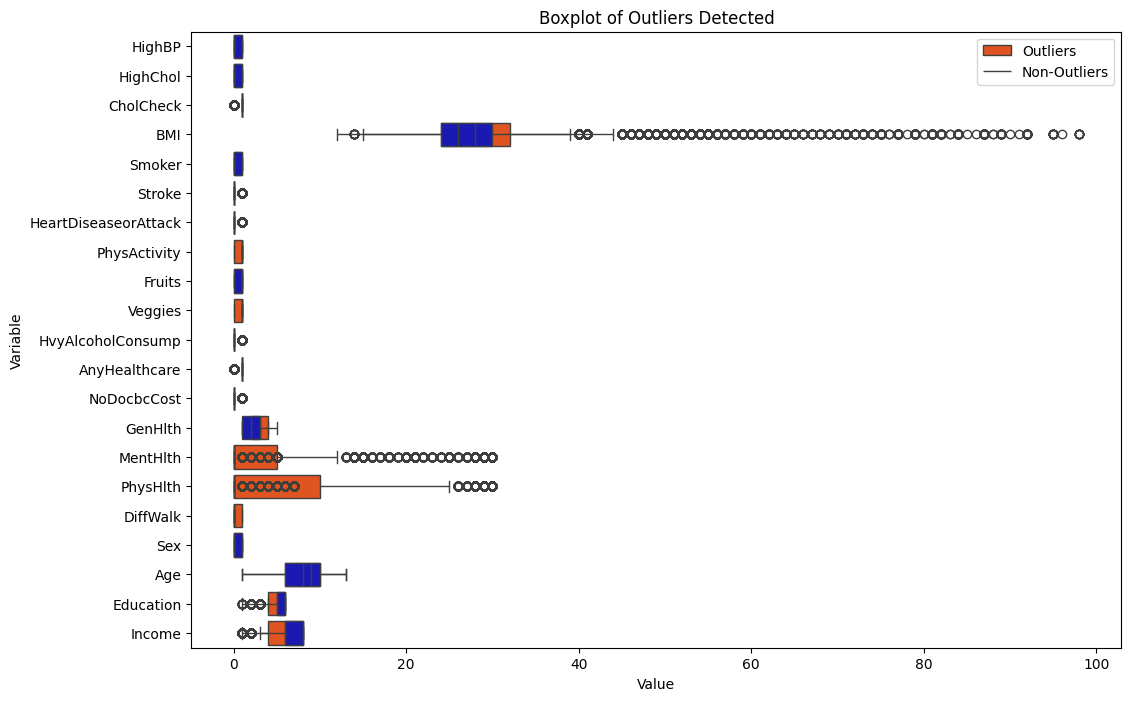

In [ ]:
#Importar librerías necesaria
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de outliers para todas las variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=X[outliers], color='orangered', orient='h')
sns.boxplot(data=X[~outliers], color='mediumblue', orient='h')
plt.title('Boxplot of Outliers Detected')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.legend(['Outliers', 'Non-Outliers'])
plt.show()

Mas adelante tomaré decisiones para ver si es conveniente o no eliminar outliers. Aunque los outliers de BMI, MenHlth y PhysHlth son importantes para el estudio sobre la estimación de diabetes. Representan casos excepcionales que reflejan la variabilidad natural en la población y pueden proporcionar información relevante sobre condiciones médicas particulares o características únicas de los participantes. Mantener estos outliers permite realizar un análisis más completo y robusto, evitando la pérdida de información valiosa y sesgos en los resultados.

In [ ]:
# Importar la librería necesaria
from sklearn.feature_selection import SelectKBest, f_classif

# Separar las características y la variable objetivo
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Utilizar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obtener los puntajes de las características
scores = selector.scores_

# Crear un dataframe con los puntajes de las características
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Puntuaciones de las Características:\n", feature_scores)

Puntuaciones de las Características:
                  Feature         Score
13               GenHlth  12832.660123
0                 HighBP  10149.140418
3                    BMI   6768.361067
16              DiffWalk   6727.221134
1               HighChol   5890.843228
18                   Age   4560.441068
6   HeartDiseaseorAttack   4260.879233
15              PhysHlth   4078.699854
20                Income   3913.752954
19             Education   2245.725730
7           PhysActivity   1923.358158
5                 Stroke   1475.321639
14              MentHlth    717.117372
2              CholCheck    589.595733
4                 Smoker    507.270568
9                Veggies    448.495944
10     HvyAlcoholConsump    426.586896
8                 Fruits    227.578441
12           NoDocbcCost    198.348259
17                   Sex    125.547952
11         AnyHealthcare     34.547987


<ipython-input-24-9e335f5b0d37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='turbo')


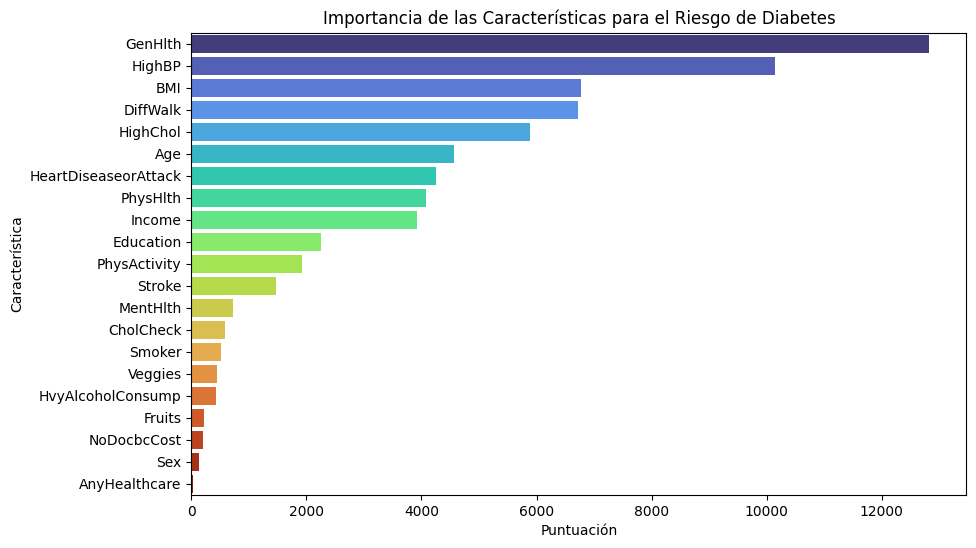

In [ ]:
# Visualizar los factores de riesgo más importantes con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='turbo')
plt.title('Importancia de las Características para el Riesgo de Diabetes')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.show()

Las características con puntuaciones más altas (por ejemplo, GenHlth, HighBP,
BMI, DiffWalk, HighChol, Age, HeartDiseaseorAttack etc.) son las más importantes para el modelo predictivo y probablemente tienen una fuerte relación con el estado de diabetes.

In [ ]:
# Selección de las características más importantes
selected_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'PhysActivity', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'NoDocbcCost', 'Diabetes_012']
df_selected = df[selected_features]

In [ ]:
# Selección de las características más importantes en orden
selected_features = ['GenHlth', 'PhysHlth', 'BMI', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 'Age', 'Income','NoDocbcCost', 'Diabetes_012']
df_selected_ordered = df[selected_features]

In [ ]:
# Mostrar las primeras filas del nuevo dataframe para verificar el orden de las características
print(df_selected_ordered.head())
print(df_selected_ordered.info())

   GenHlth  PhysHlth   BMI  HighBP  HighChol  HeartDiseaseorAttack  \
0      5.0      15.0  40.0     1.0       1.0                   0.0   
1      3.0       0.0  25.0     0.0       0.0                   0.0   
2      5.0      30.0  28.0     1.0       1.0                   0.0   
3      2.0       0.0  27.0     1.0       0.0                   0.0   
4      2.0       0.0  24.0     1.0       1.0                   0.0   

   PhysActivity  DiffWalk   Age  Income  NoDocbcCost  Diabetes_012  
0           0.0       1.0   9.0     3.0          0.0           0.0  
1           1.0       0.0   7.0     1.0          1.0           0.0  
2           0.0       1.0   9.0     8.0          1.0           0.0  
3           1.0       0.0  11.0     6.0          0.0           0.0  
4           1.0       0.0  11.0     4.0          0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
--

In [ ]:
# Agrupación por estado de diabetes y cálculo de la media de las características seleccionadas
grouped = df_selected.groupby('Diabetes_012').mean()
print(grouped)

               GenHlth    HighBP        BMI  DiffWalk  PhysActivity  HighChol  \
Diabetes_012                                                                    
0.0           2.372391  0.371132  27.742521  0.132282      0.779077  0.379171   
1.0           2.975599  0.629022  30.724466  0.277478      0.678471  0.620816   
2.0           3.290981  0.752674  31.944011  0.371216      0.630538  0.670118   

                   Age  HeartDiseaseorAttack  PhysHlth    Income  NoDocbcCost  
Diabetes_012                                                                   
0.0           7.786559              0.071833  3.582416  6.208663     0.079610  
1.0           9.083351              0.143382  6.348305  5.351112     0.129346  
2.0           9.379053              0.222882  7.954479  5.210094     0.105868  


In [ ]:
# Crear dos subconjuntos de datos
subset1 = df_selected[['GenHlth', 'PhysHlth', 'DiffWalk', 'PhysActivity', 'HighChol', 'HeartDiseaseorAttack', 'HighBP', 'BMI']]
subset2 = df_selected[['Age', 'Income', 'NoDocbcCost']]

# Concatenar los subconjuntos
concatenated = pd.concat([subset1, subset2], axis=1)
print(concatenated.head())

   GenHlth  PhysHlth  DiffWalk  PhysActivity  HighChol  HeartDiseaseorAttack  \
0      5.0      15.0       1.0           0.0       1.0                   0.0   
1      3.0       0.0       0.0           1.0       0.0                   0.0   
2      5.0      30.0       1.0           0.0       1.0                   0.0   
3      2.0       0.0       0.0           1.0       0.0                   0.0   
4      2.0       0.0       0.0           1.0       1.0                   0.0   

   HighBP   BMI   Age  Income  NoDocbcCost  
0     1.0  40.0   9.0     3.0          0.0  
1     0.0  25.0   7.0     1.0          1.0  
2     1.0  28.0   9.0     8.0          1.0  
3     1.0  27.0  11.0     6.0          0.0  
4     1.0  24.0  11.0     4.0          0.0  


Se dividieron las características seleccionadas entre las que se encuentran relacionada con la salud y las demográficas o socioeconómicas.

In [ ]:
# Describir las variables seleccionadas
df_selected.describe()

,GenHlth,HighBP,BMI,DiffWalk,PhysActivity,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Income,NoDocbcCost,Diabetes_012
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,2.511392,0.429001,28.382364,0.168224,0.756544,0.424121,8.032119,0.094186,4.242081,6.053875,0.084177,0.296921
std,1.068477,0.494934,6.608694,0.374066,0.429169,0.494210,3.054220,0.292087,8.717951,2.071148,0.277654,0.698160
min,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,2.000000,0.000000,27.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,3.000000,1.000000,31.000000,0.000000,1.000000,1.000000,10.000000,0.000000,3.000000,8.000000,0.000000,0.000000
max,5.000000,1.000000,98.000000,1.000000,1.000000,1.000000,13.000000,1.000000,30.000000,8.000000,1.000000,2.000000


# Storytelling

    Age     AgeGroup
0   9.0  60-64 years
1   7.0  50-54 years
2   9.0  60-64 years
3  11.0  70-74 years
4  11.0  70-74 years


<ipython-input-99-07157288a187>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  displot_Age = sns.histplot(data=df, x='AgeGroup', kde=True, palette='turbo', bins=13)


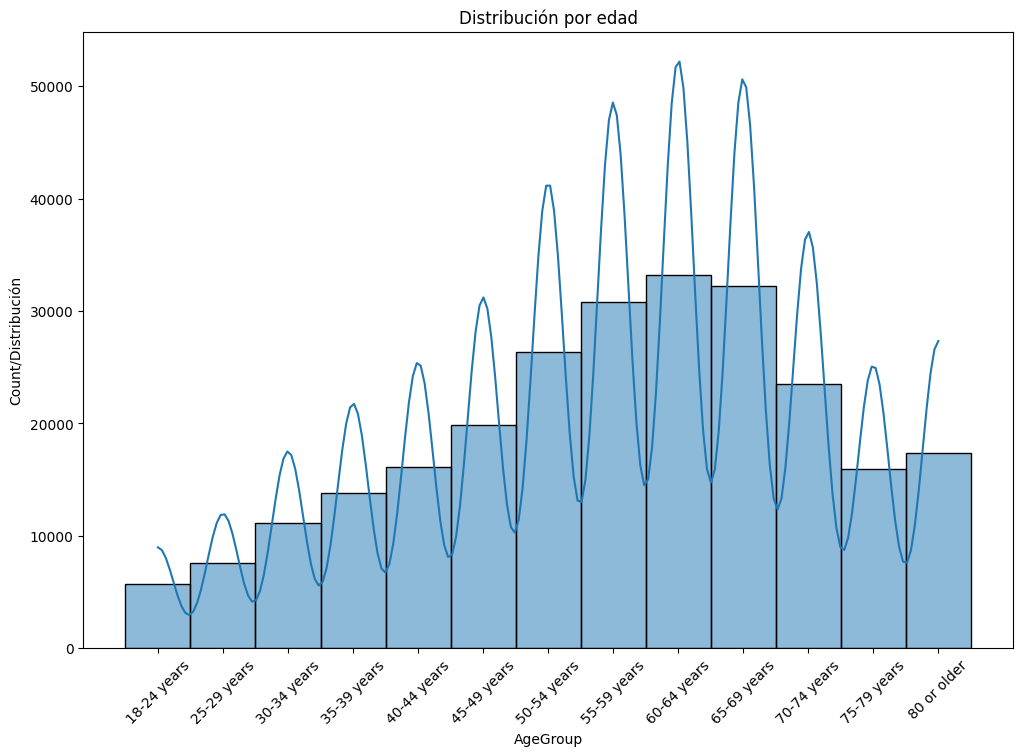

In [99]:
# Definir las etiquetas de edad en orden cronológico
age_labels = ["18-24 years", "25-29 years", "30-34 years", "35-39 years", "40-44 years",
              "45-49 years", "50-54 years", "55-59 years", "60-64 years", "65-69 years",
              "70-74 years", "75-79 years", "80 or older"]

# Crear una columna con las categorías de edad
df['AgeGroup'] = df['Age'].map({
    1: "18-24 years", 2: "25-29 years", 3: "30-34 years", 4: "35-39 years", 5: "40-44 years",
    6: "45-49 years", 7: "50-54 years", 8: "55-59 years", 9: "60-64 years", 10: "65-69 years",
    11: "70-74 years", 12: "75-79 years", 13: "80 or older"
})

# Convertir la columna AgeGroup a una categoría ordenada
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_labels, ordered=True)

# Verificar las primeras filas del dataframe con la nueva columna
print(df[['Age', 'AgeGroup']].head())

# Definir la paleta de colores para las distribuciones
pal_distribuciones = sns.color_palette("turbo", as_cmap=True)

# Ajustar el tamaño de la figura para evitar solapamiento de etiquetas
plt.figure(figsize=(12, 8))

# Realizar análisis univariado de distribución por edad con las nuevas etiquetas
displot_Age = sns.histplot(data=df, x='AgeGroup', kde=True, palette='turbo', bins=13)
displot_Age.set(ylabel='Count/Distribución', title='Distribución por edad')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

La media corresponde al grupo de **edad** de 55-59 años y existe una amplia
distribución de edades

<ipython-input-100-0532384551bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected2['Diabetes_012'] = df_selected2['Diabetes_012'].map({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})
<ipython-input-100-0532384551bd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df_selected2, palette='turbo')


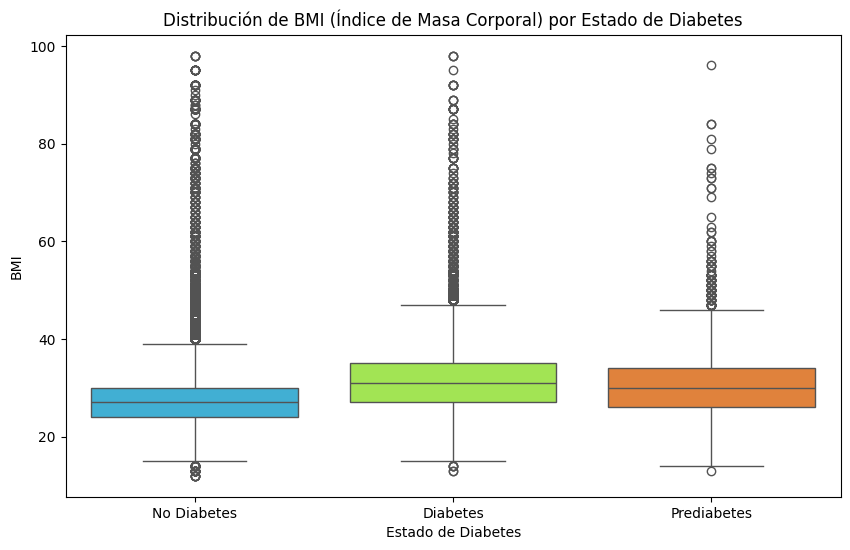

In [100]:
#Analizar IMC con diabetes

# Selección de las características de interés y la variable objetivo
important_features = ['BMI', 'Diabetes_012']
df_selected2 = df[important_features]

# Reemplazar los valores de Diabetes_012 con descripciones detalladas
df_selected2['Diabetes_012'] = df_selected2['Diabetes_012'].map({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})

# Definir el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un box plot de BMI en relación a Diabetes
sns.boxplot(x='Diabetes_012', y='BMI', data=df_selected2, palette='turbo')

# Añadir título y etiquetas
plt.title('Distribución de BMI (Índice de Masa Corporal) por Estado de Diabetes')
plt.xlabel('Estado de Diabetes')
plt.ylabel('BMI')

# Mostrar el gráfico
plt.show()

El promedio de **IMC** indica sobrepeso. Hay un amplio rango de IMC (mínimo = 12 y máximo = 98). Aquellos con diabetes o prediabetes tienen un mayor IMC (indicando mayor prevalencia de obesidad y sobrepeso).

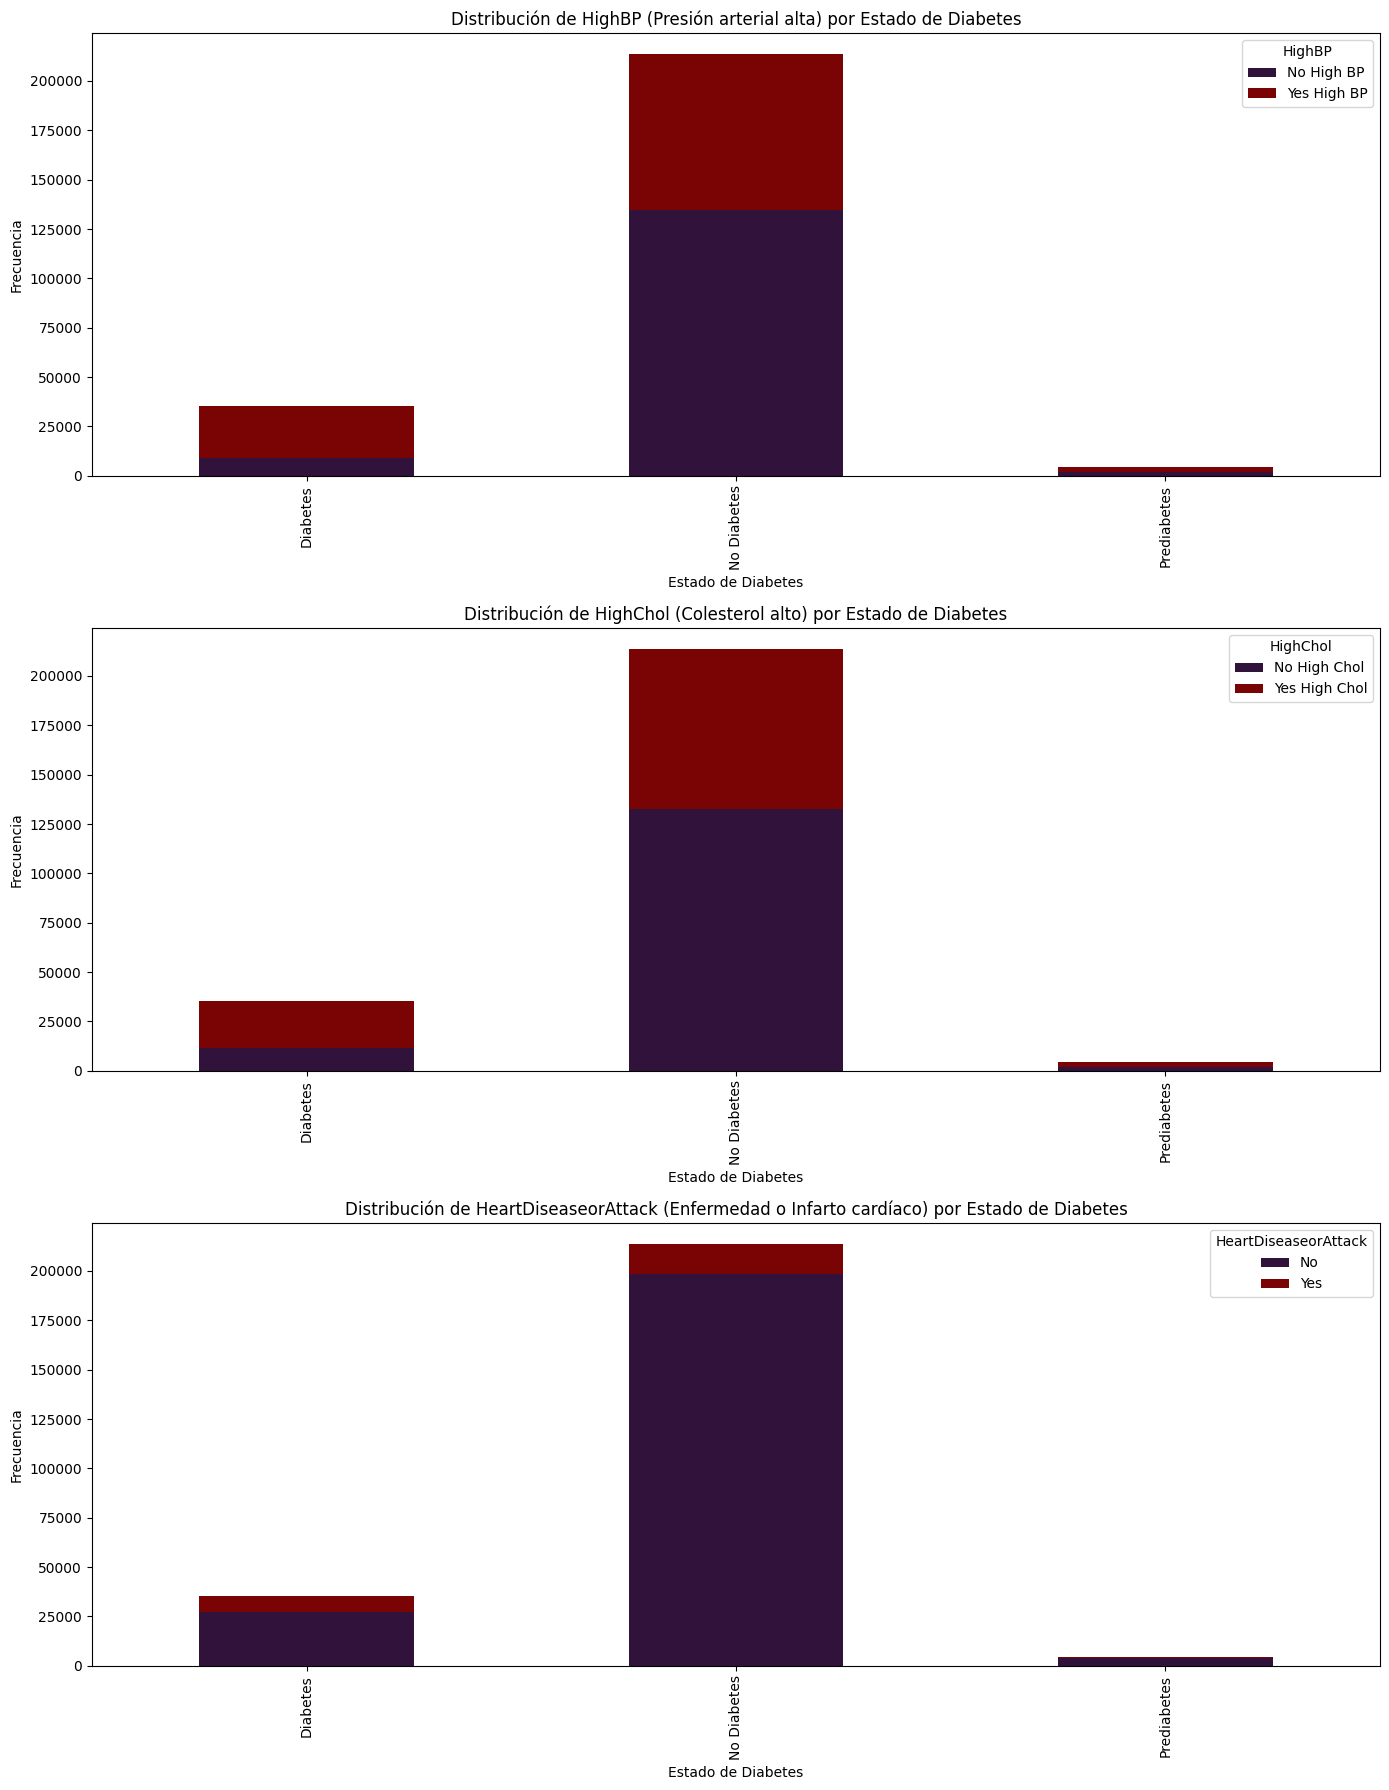

In [101]:
# Selección de las características de interés y la variable objetivo
selected_features3 = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Diabetes_012']
df_selected3 = df[selected_features3].copy()

# Reemplazar los valores de Diabetes_012 con descripciones detalladas
df_selected3['Diabetes_012'] = df_selected3['Diabetes_012'].map({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})
df_selected3['HighBP'] = df_selected3['HighBP'].map({0: 'No High BP', 1: 'Yes High BP'})
df_selected3['HighChol'] = df_selected3['HighChol'].map({0: 'No High Chol', 1: 'Yes High Chol'})
df_selected3['HeartDiseaseorAttack'] = df_selected3['HeartDiseaseorAttack'].map({0: 'No', 1: 'Yes'})

# Crear tablas cruzadas para cada variable en relación con Diabetes_012
crosstab_highbp = pd.crosstab(df_selected3['Diabetes_012'], df_selected3['HighBP'])
crosstab_highchol = pd.crosstab(df_selected3['Diabetes_012'], df_selected3['HighChol'])
crosstab_heartdisease = pd.crosstab(df_selected3['Diabetes_012'], df_selected3['HeartDiseaseorAttack'])

# Definir el tamaño de la figura
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Crear gráfico de barras apiladas para HighBP en relación a Diabetes
crosstab_highbp.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[0])
axes[0].set_title('Distribución de HighBP (Presión arterial alta) por Estado de Diabetes')
axes[0].set_xlabel('Estado de Diabetes')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Crear gráfico de barras apiladas para HighChol en relación a Diabetes
crosstab_highchol.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[1])
axes[1].set_title('Distribución de HighChol (Colesterol alto) por Estado de Diabetes')
axes[1].set_xlabel('Estado de Diabetes')
axes[1].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Crear gráfico de barras apiladas para HeartDiseaseorAttack en relación a Diabetes
crosstab_heartdisease.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[2])
axes[2].set_title('Distribución de HeartDiseaseorAttack (Enfermedad o Infarto cardíaco) por Estado de Diabetes')
axes[2].set_xlabel('Estado de Diabetes')
axes[2].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aquellos con **diabetes** o prediabetes tienen una mayor incidencia de **presión arterial alta**, **colesterol alto** y **enfermedades o ataques cardíacos**.

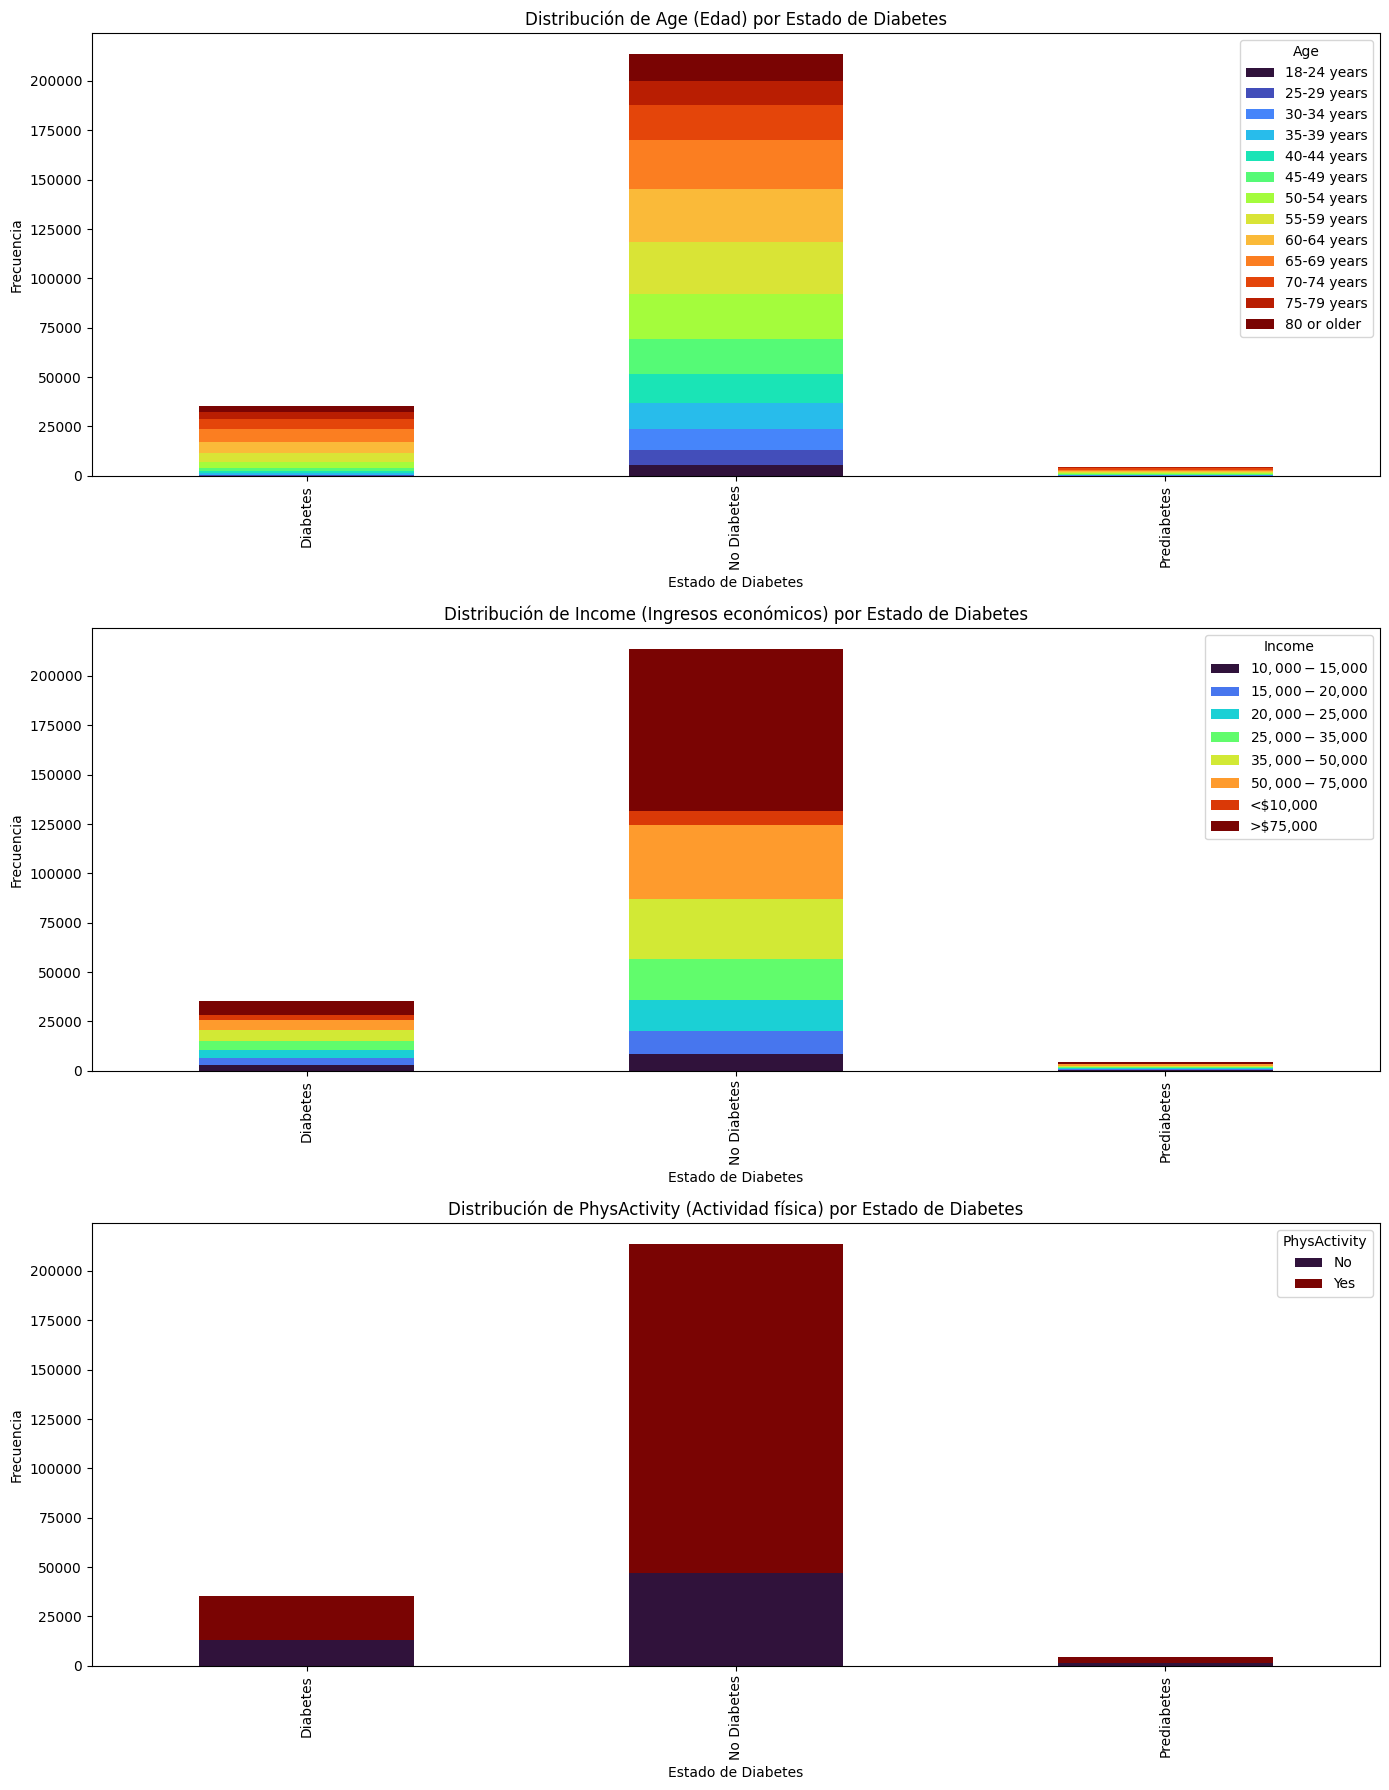

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Selección de las características de interés y la variable objetivo
selected_features4 = ['Age', 'Income', 'PhysActivity', 'Diabetes_012']
df_selected4 = df[selected_features4].copy()

# Reemplazar los valores de Diabetes_012 con descripciones detalladas
df_selected4['Diabetes_012'] = df_selected4['Diabetes_012'].map({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})

# Reemplazar los valores de Age, Income y PhysActivity con descripciones detalladas
age_labels = {
    1: '18-24 years', 2: '25-29 years', 3: '30-34 years', 4: '35-39 years',
    5: '40-44 years', 6: '45-49 years', 7: '50-54 years', 8: '55-59 years',
    9: '60-64 years', 10: '65-69 years', 11: '70-74 years', 12: '75-79 years', 13: '80 or older'
}
income_labels = {
    1: '<$10,000', 2: '$10,000-$15,000', 3: '$15,000-$20,000', 4: '$20,000-$25,000',
    5: '$25,000-$35,000', 6: '$35,000-$50,000', 7: '$50,000-$75,000', 8: '>$75,000'
}
phys_activity_labels = {0: 'No', 1: 'Yes'}

df_selected4['Age'] = df_selected4['Age'].map(age_labels)
df_selected4['Income'] = df_selected4['Income'].map(income_labels)
df_selected4['PhysActivity'] = df_selected4['PhysActivity'].map(phys_activity_labels)

# Crear tablas cruzadas para cada variable en relación con Diabetes_012
crosstab_age1 = pd.crosstab(df_selected4['Diabetes_012'], df_selected4['Age'])
crosstab_income1 = pd.crosstab(df_selected4['Diabetes_012'], df_selected4['Income'])
crosstab_physactivity1 = pd.crosstab(df_selected4['Diabetes_012'], df_selected4['PhysActivity'])

# Definir el tamaño de la figura
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Crear gráfico de barras apiladas para Age en relación a Diabetes
crosstab_age1.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[0])
axes[0].set_title('Distribución de Age (Edad) por Estado de Diabetes')
axes[0].set_xlabel('Estado de Diabetes')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Crear gráfico de barras apiladas para Income en relación a Diabetes
crosstab_income1.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[1])
axes[1].set_title('Distribución de Income (Ingresos económicos) por Estado de Diabetes')
axes[1].set_xlabel('Estado de Diabetes')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=90)

# Crear gráfico de barras apiladas para PhysActivity en relación a Diabetes
crosstab_physactivity1.plot(kind='bar', stacked=True, colormap='turbo', ax=axes[2])
axes[2].set_title('Distribución de PhysActivity (Actividad física) por Estado de Diabetes')
axes[2].set_xlabel('Estado de Diabetes')
axes[2].set_ylabel('Frecuencia')
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Las personas con **diabetes** o prediabetes realizan menos **actividad física**. La **edad** aumenta en las personas con diabetes, indicando que es más común en personas mayores. Mientras que los **ingresos promedios** son menores en aquellos que padecen la enfermedad

In [103]:
# Análisis de correlación
# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Extraer las correlaciones con la variable objetivo Diabetes_012
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)

# Mostrar las correlaciones
print(correlation_with_target)

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
NoDocbcCost             0.035436
PhysActivity           -0.121947
Income                 -0.171483
Name: Diabetes_012, dtype: float64


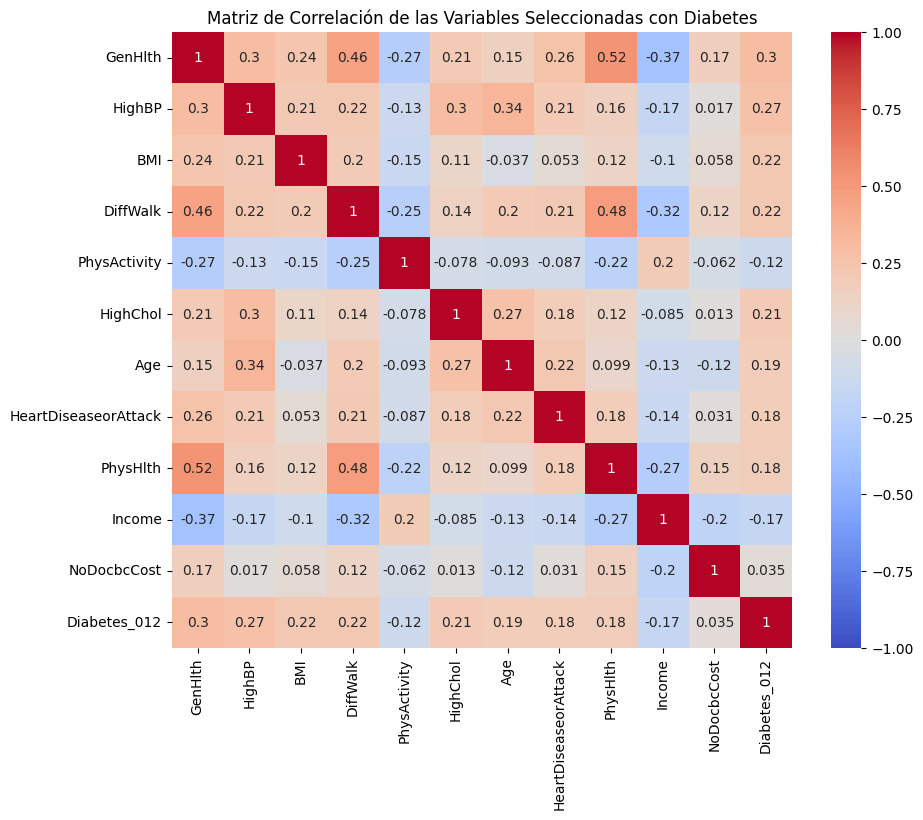

In [104]:
# Definir el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Matriz de Correlación de las Variables Seleccionadas con Diabetes')

# Mostrar el gráfico
plt.show()

# Conclusiones preliminares






**Variable objetivo**
*   Aproximadamente el 29.7% de los encuestados tienen **prediabetes** o **diabetes**

**Características relacionadas a la salud**
*   La mayoría de las personas califican su **salud general** como entre "buena" y "regular". En promedio, las personas reportan alrededor de 4 días de mala **salud física** al mes. Como mínimo 0 y máximo 30 días
*   El promedio de **IMC** indica sobrepeso. Hay un amplio rango de IMC (mínimo = 12 y máximo = 98)
*   Aproximadamente el 43% y 42% de los encuestados tienen **presión arterial alta** y **colesterol alto** respectivamente. Hay una división casi uniforme entre quienes tienen y no tienen presión arterial o colesterol alto. En menor prevalencia, aproximadamente el 9% de los encuestados han tenido **enfermedad cardíaca o ataque cardíaco**
*   Aproximadamente el 75.7% de los encuestados realizaron **actividad física** en los últimos 30 días y solo el 17% de los encuestados tienen **dificultad para caminar**

**Características relacionadas a parámetros demográficos o socioeconómicos**
*   La media corresponde al grupo de edad de 55-59 años y existe una amplia distribución de edades
*   La media corresponde a la categoría de ingresos de $50,000-74,999 y existe una amplia distribución de ingresos

**Relación de las características y la variable objetivo**
*   Las personas con **diabetes** califican su **salud general** como peor y reportan más días de mala **salud física** que aquellas sin diabetes o con prediabetes.
*   Aquellos con diabetes o prediabetes tienen una mayor incidencia de **presión arterial alta**, **colesterol alto** y **enfermedades o ataques cardíacos**, así como un mayor **IMC** (indicando mayor prevalencia de obesidad y sobrepeso).
*   Las personas con diabetes o prediabetes presentan una mayor **dificultad para caminar** y menor **actividad física**.
*   La **edad** aumenta en las personas con diabetes, indicando que es más común en personas mayores. Mientras que los **ingresos promedios** son menores en aquellos que padecen la enfermedad y por ende en ocasiones no pueden **asistir al médico**.